# Pre-Processing and Training Data

# Contents<a id='Contents'></a>
* [1 Pre-Processing and Training Data](#1_Pre-Processing_and_Training_Data)
  * [1.1 Problem Statement](#1.1_Problem_Statement)
  * [1.2 Imports](#1.2_Imports)
  * [1.3 Sourcing and Loading](#1.3_Sourcing_and_Loading)
      * [1.3.1 Load the Data](#1.3.2_Load_the_Data)
      * [1.3.2 Explore the Data](#1.3.2_Explore_the_Data)
      * [1.3.3 Filtering Down to One Location](#1.3.3_Filtering_Down_to_One_Location)
  * [2.1 Transforming and Visualizing](#2.1_Transforming_and_Visualizing)
      * [2.1.1 Setting Date as Index](#2.1.1_Setting_Date_as_Index)
      * [2.1.2 Making a Predictor Value y](#2.1.2_Making_a_Predictor_Value_y)
      * [2.1.3 Creating Train/Test Split](#2.1.3_Creating_Train/Test_Split)
  * [3.1 Modeling](#3.1_Modeling)
      * [3.1.1 ARIMA Model](#3.1.1_ARIMA_Model)
          * [3.1.1.1 Decomposition](#3.1.1.1_Decomposition)
          * [3.1.1.2 Testing for Stationarity with KPSS](#3.1.1.2_Testing_for_Stationarity_with_KPSS)
          * [3.1.1.3 Making the Data Stationary](#3.1.1.3_Making_the_Data_Stationary)
          * [3.1.1.4 ARIMA Model](#3.1.1.4_ARIMA_Model)  
      * [3.2.1 Prophet Model](#3.2.1_Prophet_Model)
      * [3.3.1 PMDARIMA Model](#3.3.1_PMDARIMA_Model)

## 1.1 Problem Statement

Now that we know there is no missing data and we have all the data we need, we will start making models with one store location. I am interested in 3365 - Gardens on Havana - Aurora, CO (XF) because it is one of the busiest stores in the nation. Once we have built a model that fits our requirements, we will move to modeling.

## 1.2 Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

## 1.3 Sourcing and Loading

### 1.3.1 Load the Data

In [2]:
df = pd.read_excel(r'/Users/Alan/Library/CloudStorage/OneDrive-Comcast/Python/Springboard/Data Wrangling 2.xlsx')
df.head().T
df.tail().T

,76335,76336,76337,76338,76339
Traffic_Date,2022-12-21 00:00:00,2022-12-21 00:00:00,2022-12-21 00:00:00,2022-12-21 00:00:00,2022-12-21 00:00:00
STORE_NAME,"59034 - Highbury Centre - West Valley City, UT...","59038 - Diamond Plaza - Ogden, UT (XF)",59046 - Broadmoor Towne Center - Colorado Spri...,"59055 - Albuquerque, NM (Uptown)","59056 - Albuquerque, NM (Cottonwood) (BP)"
STORE_CITY_NAME,West Valley City,Ogden,Colorado Springs,Albuquerque,Albuquerque
STORE_STATE_CODE,UT,UT,CO,NM,NM
Door_Swings,113,213,205,105,102


In [3]:
df.rename(columns={'STORE_NAME' : 'store_name', 'Traffic_Date' : 'date', 'STORE_CITY_NAME' : 'city', 'STORE_STATE_CODE' : 'state','Door_Swings' : 'door_swings'}, inplace=True)

### 1.3.2 Explore the Data

In [4]:
df.head()

,date,store_name,city,state,door_swings
0,2014-12-22,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,656
1,2014-12-22,"3352 - Lakewood, CO (XF)",Lakewood,CO,452
2,2014-12-22,"3353 - Colorado Springs, CO (XF)",Colorado Springs,CO,562
3,2014-12-22,"3354 - Thornton, CO (XF)",Thornton,CO,594
4,2014-12-22,"3356 - Boulder, CO (XF)",Boulder,CO,369


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76340 entries, 0 to 76339
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         76340 non-null  datetime64[ns]
 1   store_name   76340 non-null  object        
 2   city         76340 non-null  object        
 3   state        76340 non-null  object        
 4   door_swings  76340 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.9+ MB


In [6]:
df.dtypes

date           datetime64[ns]
store_name             object
city                   object
state                  object
door_swings             int64
dtype: object

In [7]:
df.isnull().values.any()

False

### 1.3.3 Filtering Down to One Location

In [8]:
a3365 = df[df.store_name == '3365 - Gardens on Havana - Aurora, CO (XF)']

In [9]:
a3365.head()

,date,store_name,city,state,door_swings
16438,2018-10-06,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,1017
16458,2018-10-07,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,433
16478,2018-10-08,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,881
16498,2018-10-09,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,683
16518,2018-10-10,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,734


In [10]:
a3365.tail()

,date,store_name,city,state,door_swings
76104,2022-12-17,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,597
76154,2022-12-18,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,329
76204,2022-12-19,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,577
76254,2022-12-20,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,478
76304,2022-12-21,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,465


## 2.1 Transforming and Visualizing

### 2.1.1 Transforming the Data

In [11]:
a3365['fiscal_month'] = np.where(a3365.date.dt.day < 22, a3365.date, a3365.date + pd.DateOffset(months=1))
a3365.fiscal_month = a3365.fiscal_month.dt.strftime('%Y-%m')

/var/folders/4z/kf4r7q6n1q50bwwtvfh04kpc0000gp/T/ipykernel_96395/3009544006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a3365['fiscal_month'] = np.where(a3365.date.dt.day < 22, a3365.date, a3365.date + pd.DateOffset(months=1))
/var/folders/4z/kf4r7q6n1q50bwwtvfh04kpc0000gp/T/ipykernel_96395/3009544006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a3365.fiscal_month = a3365.fiscal_month.dt.strftime('%Y-%m')


Our fiscal months start on the 22nd and go to the 21st of every month. I have to write a code to add fiscal month to the dataset.

In [12]:
print(a3365)

            date                                  store_name    city state  \
16438 2018-10-06  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16458 2018-10-07  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16478 2018-10-08  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16498 2018-10-09  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16518 2018-10-10  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
...          ...                                         ...     ...   ...   
76104 2022-12-17  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76154 2022-12-18  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76204 2022-12-19  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76254 2022-12-20  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76304 2022-12-21  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   

       door_swings fiscal_month  
16438         1017      2018-

In [13]:
a3365['fiscal_month'] = pd.to_datetime(a3365['fiscal_month'])

/var/folders/4z/kf4r7q6n1q50bwwtvfh04kpc0000gp/T/ipykernel_96395/2455018305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a3365['fiscal_month'] = pd.to_datetime(a3365['fiscal_month'])


Converted the `fiscal_month` column to a datetime.

In [14]:
print(a3365)

            date                                  store_name    city state  \
16438 2018-10-06  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16458 2018-10-07  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16478 2018-10-08  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16498 2018-10-09  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16518 2018-10-10  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
...          ...                                         ...     ...   ...   
76104 2022-12-17  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76154 2022-12-18  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76204 2022-12-19  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76254 2022-12-20  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76304 2022-12-21  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   

       door_swings fiscal_month  
16438         1017   2018-10-

In [15]:
a3365.dtypes

date            datetime64[ns]
store_name              object
city                    object
state                   object
door_swings              int64
fiscal_month    datetime64[ns]
dtype: object

I want to remove all data besides `fiscal_month` and I want to add a column with the monthly total door swings.

In [16]:
a3365 = a3365.groupby(a3365.fiscal_month)

In [17]:
a3365 = a3365['door_swings'].sum().reset_index()

In [18]:
a3365 = a3365.set_index('fiscal_month')

In [19]:
a3365.rename(columns={'door_swings' : 'monthly_door_swings'}, inplace=True)

In [20]:
print(a3365)

              monthly_door_swings
fiscal_month                     
2018-10-01                  12647
2018-11-01                  26827
2018-12-01                  23800
2019-01-01                  25154
2019-02-01                  23713
2019-03-01                  22679
2019-04-01                  24328
2019-05-01                  22982
2019-06-01                  24835
2019-07-01                  23335
2019-08-01                  26572
2019-09-01                  25533
2019-10-01                  23168
2019-11-01                  20639
2019-12-01                  19031
2020-01-01                  19077
2020-02-01                  18824
2020-03-01                  19365
2020-04-01                  14772
2020-05-01                  15855
2020-06-01                  19299
2020-07-01                  22360
2020-08-01                  26327
2020-09-01                  24834
2020-10-01                  22829
2020-11-01                  23648
2020-12-01                  20887
2021-01-01    

### 2.1.2 Making a Predictor Value `y`

In [21]:
y = a3365['monthly_door_swings']

In [22]:
print(y)

fiscal_month
2018-10-01    12647
2018-11-01    26827
2018-12-01    23800
2019-01-01    25154
2019-02-01    23713
2019-03-01    22679
2019-04-01    24328
2019-05-01    22982
2019-06-01    24835
2019-07-01    23335
2019-08-01    26572
2019-09-01    25533
2019-10-01    23168
2019-11-01    20639
2019-12-01    19031
2020-01-01    19077
2020-02-01    18824
2020-03-01    19365
2020-04-01    14772
2020-05-01    15855
2020-06-01    19299
2020-07-01    22360
2020-08-01    26327
2020-09-01    24834
2020-10-01    22829
2020-11-01    23648
2020-12-01    20887
2021-01-01    21842
2021-02-01    22975
2021-03-01    23080
2021-04-01    25475
2021-05-01    24777
2021-06-01    25046
2021-07-01    23238
2021-08-01    19674
2021-09-01    16812
2021-10-01    17623
2021-11-01    16824
2021-12-01    14577
2022-01-01    14238
2022-02-01    14969
2022-03-01    14484
2022-04-01    16305
2022-05-01    14590
2022-06-01    14851
2022-07-01    15951
2022-08-01    16959
2022-09-01    17413
2022-10-01    16415
2022-11

### 2.1.3 Getting Summary Statistics for `y`

In [23]:
a3365.describe()

,monthly_door_swings
count,51.000000
mean,20220.509804
std,4165.520349
min,12647.000000
25%,16360.000000
50%,20639.000000
75%,23680.500000
max,26827.000000


In [24]:
a3365.dtypes

monthly_door_swings    int64
dtype: object

<AxesSubplot:xlabel='fiscal_month'>

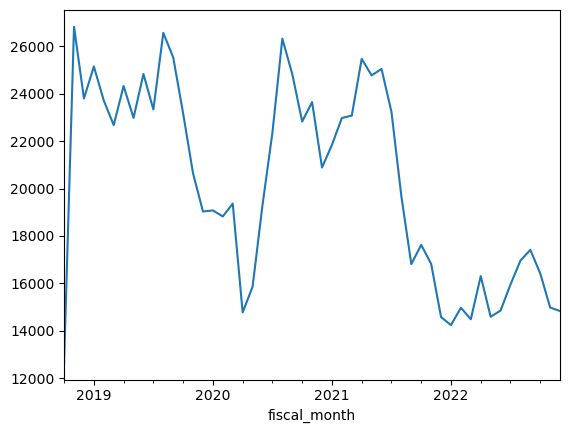

In [25]:
y.plot()

In [26]:
y_log = np.log(y)

In [27]:
print(y_log)

fiscal_month
2018-10-01     9.445175
2018-11-01    10.197164
2018-12-01    10.077441
2019-01-01    10.132772
2019-02-01    10.073779
2019-03-01    10.029195
2019-04-01    10.099383
2019-05-01    10.042467
2019-06-01    10.120009
2019-07-01    10.057710
2019-08-01    10.187613
2019-09-01    10.147727
2019-10-01    10.050527
2019-11-01     9.934938
2019-12-01     9.853825
2020-01-01     9.856239
2020-02-01     9.842888
2020-03-01     9.871223
2020-04-01     9.600489
2020-05-01     9.671240
2020-06-01     9.867809
2020-07-01    10.015029
2020-08-01    10.178350
2020-09-01    10.119969
2020-10-01    10.035787
2020-11-01    10.071034
2020-12-01     9.946882
2021-01-01     9.991590
2021-02-01    10.042162
2021-03-01    10.046722
2021-04-01    10.145453
2021-05-01    10.117671
2021-06-01    10.128469
2021-07-01    10.053544
2021-08-01     9.887053
2021-09-01     9.729848
2021-10-01     9.776960
2021-11-01     9.730562
2021-12-01     9.587200
2022-01-01     9.563670
2022-02-01     9.613737
202

### 2.1.4 Creating Train/Test Split

In [28]:
y_test = a3365.loc['2022-01-01':'2022-12-01']

In [29]:
print(y_test)

              monthly_door_swings
fiscal_month                     
2022-01-01                  14238
2022-02-01                  14969
2022-03-01                  14484
2022-04-01                  16305
2022-05-01                  14590
2022-06-01                  14851
2022-07-01                  15951
2022-08-01                  16959
2022-09-01                  17413
2022-10-01                  16415
2022-11-01                  14979
2022-12-01                  14829


In [30]:
y_train = a3365.loc['2018-10-01':'2021-12-01']

In [31]:
print(y_train)

              monthly_door_swings
fiscal_month                     
2018-10-01                  12647
2018-11-01                  26827
2018-12-01                  23800
2019-01-01                  25154
2019-02-01                  23713
2019-03-01                  22679
2019-04-01                  24328
2019-05-01                  22982
2019-06-01                  24835
2019-07-01                  23335
2019-08-01                  26572
2019-09-01                  25533
2019-10-01                  23168
2019-11-01                  20639
2019-12-01                  19031
2020-01-01                  19077
2020-02-01                  18824
2020-03-01                  19365
2020-04-01                  14772
2020-05-01                  15855
2020-06-01                  19299
2020-07-01                  22360
2020-08-01                  26327
2020-09-01                  24834
2020-10-01                  22829
2020-11-01                  23648
2020-12-01                  20887
2021-01-01    

I am building a model using the last 12 months. I have broken up the training test set and test set.

## 3.1 Modeling

### 3.1.1 ARIMA Model

#### 3.1.1.1 Decomposition

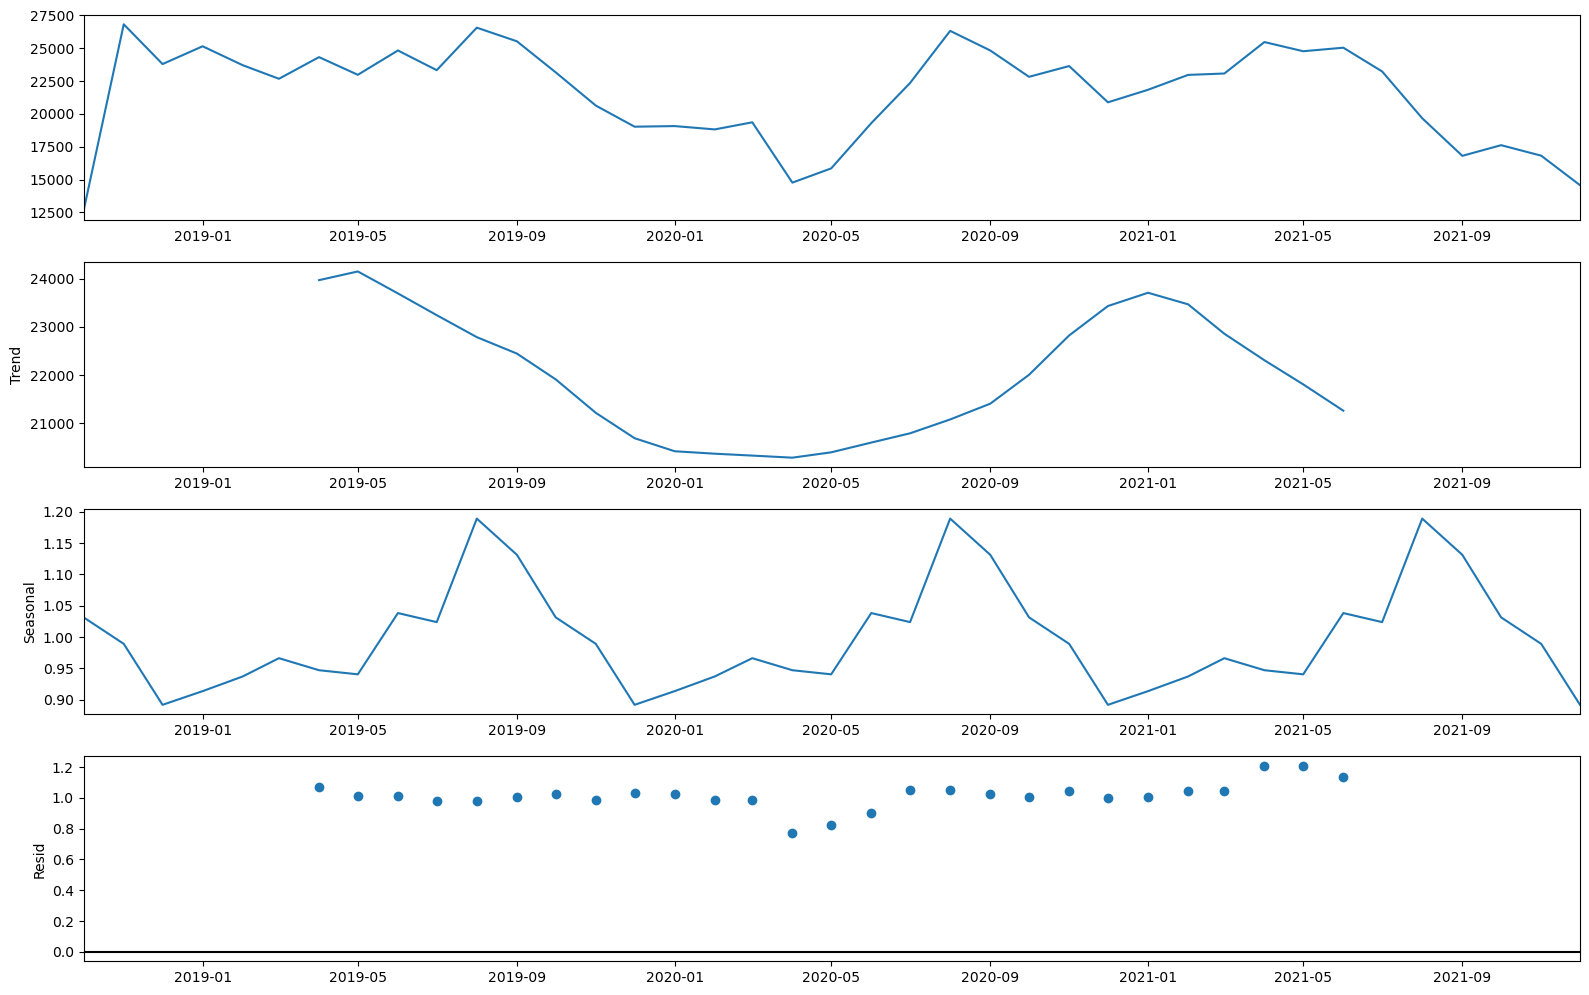

In [32]:
import statsmodels.api as sm

decomp = sm.tsa.seasonal_decompose(y_train, model='multiplicative')
fig = decomp.plot()
fig.set_size_inches((16, 10))
fig.tight_layout()
plt.show()

#### 3.1.1.2 Testing for Stationarity with KPSS

In [33]:
from statsmodels.tsa.stattools import kpss

kpss(y_train)

/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.1532689749202055,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### 3.1.1.3 Making the Data Stationary

<AxesSubplot:xlabel='fiscal_month'>

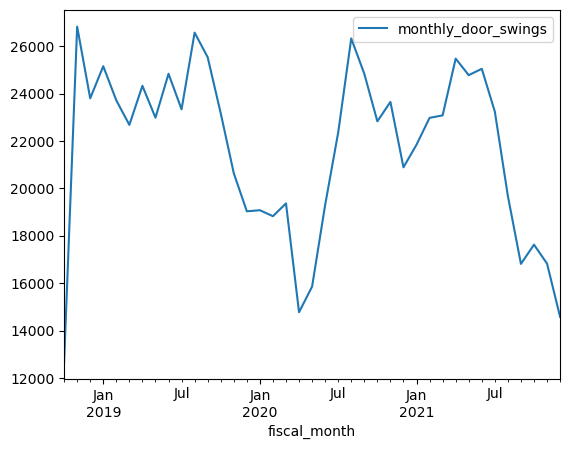

In [34]:
y_train.plot()

In [35]:
y_log = np.log(y_train)

In [36]:
print(y_log)

              monthly_door_swings
fiscal_month                     
2018-10-01               9.445175
2018-11-01              10.197164
2018-12-01              10.077441
2019-01-01              10.132772
2019-02-01              10.073779
2019-03-01              10.029195
2019-04-01              10.099383
2019-05-01              10.042467
2019-06-01              10.120009
2019-07-01              10.057710
2019-08-01              10.187613
2019-09-01              10.147727
2019-10-01              10.050527
2019-11-01               9.934938
2019-12-01               9.853825
2020-01-01               9.856239
2020-02-01               9.842888
2020-03-01               9.871223
2020-04-01               9.600489
2020-05-01               9.671240
2020-06-01               9.867809
2020-07-01              10.015029
2020-08-01              10.178350
2020-09-01              10.119969
2020-10-01              10.035787
2020-11-01              10.071034
2020-12-01               9.946882
2021-01-01    

In [37]:
y_log.index = pd.to_datetime(y_log.index)

In [38]:
y_log.dtypes

monthly_door_swings    float64
dtype: object

<AxesSubplot:xlabel='fiscal_month'>

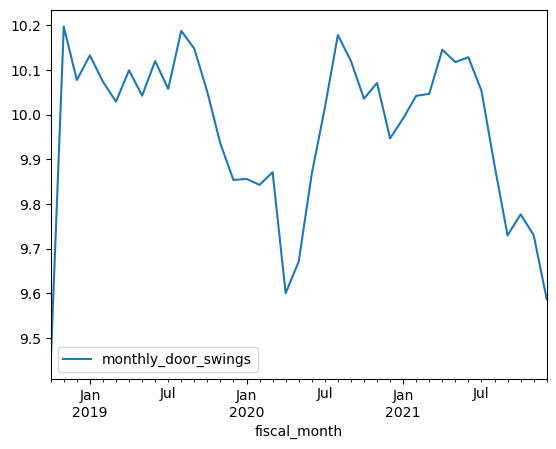

In [39]:
y_log.plot()

In [40]:
y_diff = y_log.diff().dropna()

<AxesSubplot:xlabel='fiscal_month'>

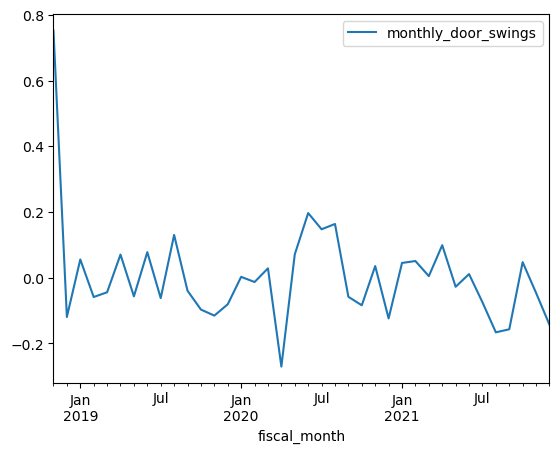

In [41]:
y_diff.plot()

In [42]:
kpss(y_diff)

/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.27622236262815286,
 0.1,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### 3.1.1.4 ARIMA Model

In [43]:
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA

In [115]:
def evaluate_arima_model(y, arima_order):
    split = int(len(y) * 0.8)

    train, test = y[0:split], y[split:len(y)]
    past = [x for x in train]

    predictions = list()
    for i in range(len(test)):
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit()
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])

    error = mean_absolute_percentage_error(test, predictions)

    return error 

In [116]:
def evaluate_models(y_train, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None

    for p in p_values:

        for d in d_values:

            for q in q_values:

                order = (p, d, q)
                try:
                    mape = evaluate_arima_model(y_train, order)
                    if mape < best_score:
                        best_score, best_cfg = mape, order
                    print('ARIMA%s MAPE=%.12f' % (order,mape))
                except:
                    continue
    print("\nBest ARIMA%s MAPE=%.3f" % (best_cfg, best_score))
    return (best_cfg, best_score)

In [117]:
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [118]:
import warnings
warnings.filterwarnings("ignore")
evaluate_models(y, p_values, d_values, q_values)

ARIMA(0, 0, 0) MAPE=0.340479241306
ARIMA(0, 0, 1) MAPE=0.183164616159
ARIMA(0, 0, 2) MAPE=0.138112543876
ARIMA(0, 1, 0) MAPE=0.059125081999
ARIMA(0, 1, 1) MAPE=0.063010549906
ARIMA(0, 1, 2) MAPE=0.064518431689
ARIMA(0, 2, 0) MAPE=0.087866808634
ARIMA(0, 2, 1) MAPE=0.070052474765
ARIMA(0, 2, 2) MAPE=0.061013719771
ARIMA(1, 0, 0) MAPE=0.084824176972
ARIMA(1, 0, 1) MAPE=0.084692753353
ARIMA(1, 0, 2) MAPE=0.127393697971
ARIMA(1, 1, 0) MAPE=0.063882287140
ARIMA(1, 1, 1) MAPE=0.108720058852
ARIMA(1, 1, 2) MAPE=0.100291286208
ARIMA(1, 2, 0) MAPE=0.081736408557
ARIMA(1, 2, 1) MAPE=0.062526005197
ARIMA(1, 2, 2) MAPE=0.113087244907
ARIMA(2, 0, 0) MAPE=0.084760615168
ARIMA(2, 0, 1) MAPE=0.090735136970
ARIMA(2, 0, 2) MAPE=0.128996436394
ARIMA(2, 1, 0) MAPE=0.063821845653
ARIMA(2, 1, 1) MAPE=0.078772049574
ARIMA(2, 1, 2) MAPE=0.082845806244
ARIMA(2, 2, 0) MAPE=0.076436833235
ARIMA(2, 2, 1) MAPE=0.062971027533
ARIMA(2, 2, 2) MAPE=0.102635826588

Best ARIMA(0, 1, 0) MAPE=0.059


((0, 1, 0), 0.05912508199937014)

In [139]:
def evaluate_arima_model(y, arima_order):

    train, test = y_train, y_test
    past = [x for x in train]

    predictions = list()
    for i in range(len(test)):
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit()
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])

    error = mean_absolute_percentage_error(test, predictions)

    return error 

In [140]:
def evaluate_models(y, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None

    for p in p_values:

        for d in d_values:

            for q in q_values:

                order = (p, d, q)
                try:
                    mape = evaluate_arima_model(y, order)
                    if mape < best_score:
                        best_score, best_cfg = mape, order
                    print('ARIMA%s MAPE=%.12f' % (order,mape))
                except:
                    continue
    print("\nBest ARIMA%s MAPE=%.3f" % (best_cfg, best_score))
    return (best_cfg, best_score)

In [141]:
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [142]:
import warnings
warnings.filterwarnings("ignore")
evaluate_models(y, p_values, d_values, q_values)


Best ARIMANone MAPE=inf


(None, inf)

In [143]:
p= 0
d= 1
q= 0
model = ARIMA(y_log, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(12)

In [49]:
print(forecast)

2022-01-01    9.5872
2022-02-01    9.5872
2022-03-01    9.5872
2022-04-01    9.5872
2022-05-01    9.5872
2022-06-01    9.5872
2022-07-01    9.5872
2022-08-01    9.5872
2022-09-01    9.5872
2022-10-01    9.5872
2022-11-01    9.5872
2022-12-01    9.5872
Freq: MS, Name: predicted_mean, dtype: float64


In [50]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     monthly_door_swings   No. Observations:                   39
Model:                  ARIMA(0, 1, 0)   Log Likelihood                  16.252
Date:                 Wed, 25 Jan 2023   AIC                            -30.503
Time:                         14:57:40   BIC                            -28.866
Sample:                     10-01-2018   HQIC                           -29.921
                          - 12-01-2021                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0249      0.002     11.139      0.000       0.021       0.029
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               229.75
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             2.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

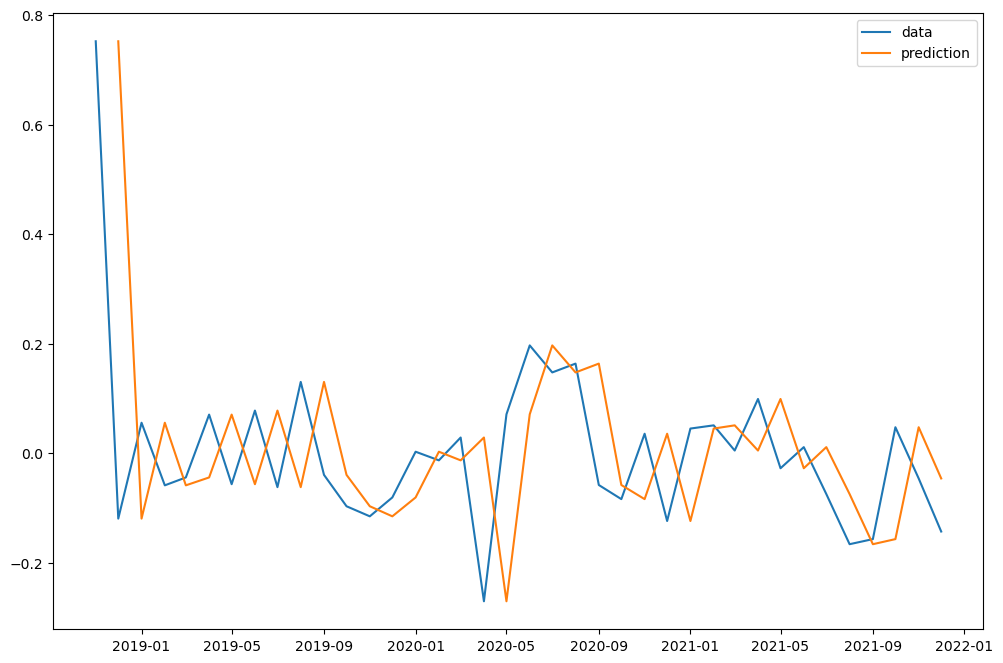

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = plt.plot(y_log.diff(), label="data")
ax = plt.plot(model_fit.predict()[1:].diff(), label="prediction")
plt.legend()
plt.show()

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2021-12-01 00:00:00'), 'Prediction'], dtype=object)

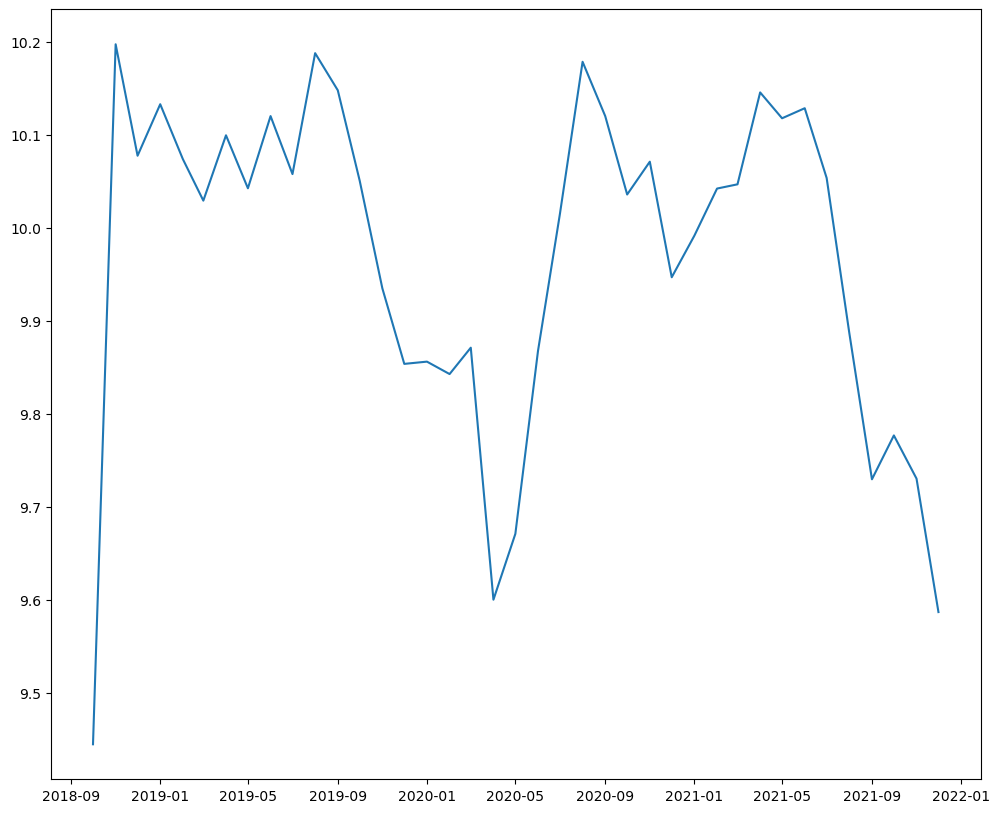

In [52]:
forecast_period = 12
date_range = pd.date_range(y_log.index[-1], periods = forecast_period, 
              freq='MS').strftime("%Y-%m-%d").tolist()

future_months = pd.DataFrame(date_range, columns = ['Month'])
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace = True)
future_months['Prediction'] = forecast[0]

plt.figure(figsize=(12,10))
plt.plot(y_log)
plt.plot(y_log['Dec 2021'].append(future_months['Prediction']))
plt.show()

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2021-12-01 00:00:00'), 'Prediction'], dtype=object)

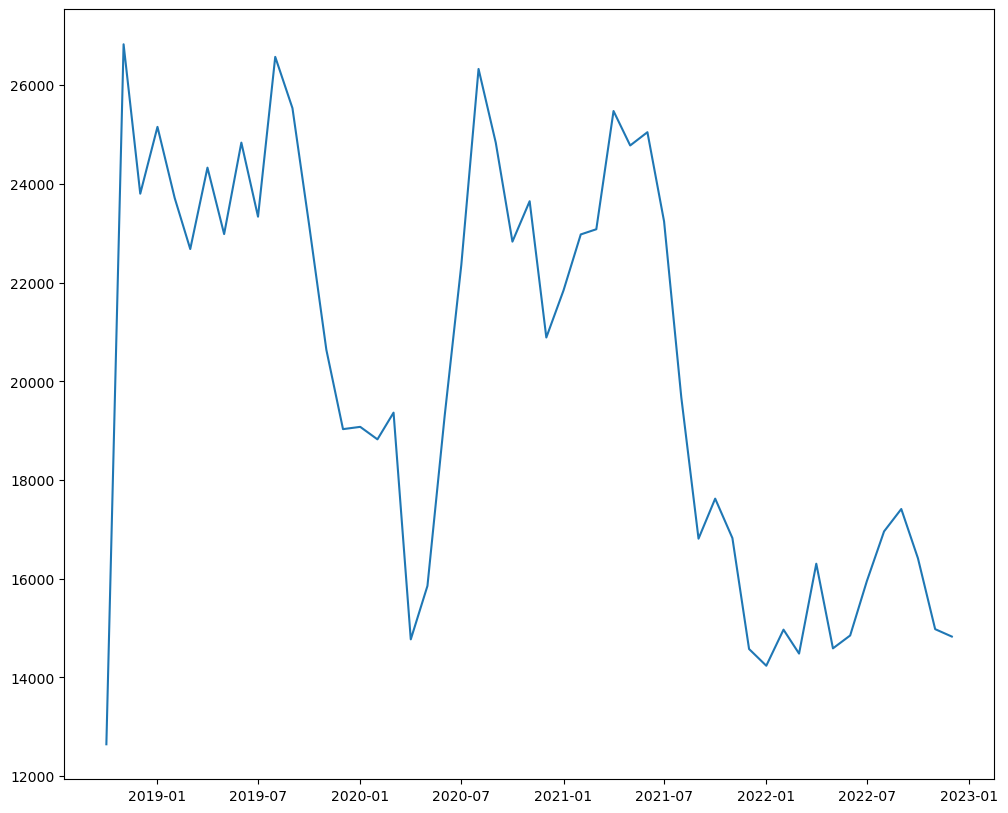

In [53]:
plt.subplots(figsize=(12,10))
plt.plot(y)
plt.plot(np.exp(y_log['Dec 2021'].append(future_months['Prediction'])))
plt.show()

### 3.2.1 Prophet Model

In [54]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_forecast_component, plot_yearly
import matplotlib.pyplot as plt

In [55]:
p3365 = df[df.store_name == '3365 - Gardens on Havana - Aurora, CO (XF)']

In [56]:
print(p3365)

            date                                  store_name    city state  \
16438 2018-10-06  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16458 2018-10-07  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16478 2018-10-08  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16498 2018-10-09  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16518 2018-10-10  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
...          ...                                         ...     ...   ...   
76104 2022-12-17  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76154 2022-12-18  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76204 2022-12-19  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76254 2022-12-20  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76304 2022-12-21  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   

       door_swings  
16438         1017  
16458          433  


In [57]:
p3365['fiscal_month'] = np.where(p3365.date.dt.day < 22, p3365.date, p3365.date + pd.DateOffset(months=1))
p3365.fiscal_month = p3365.fiscal_month.dt.strftime('%Y-%m')

In [58]:
print(p3365)

            date                                  store_name    city state  \
16438 2018-10-06  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16458 2018-10-07  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16478 2018-10-08  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16498 2018-10-09  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16518 2018-10-10  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
...          ...                                         ...     ...   ...   
76104 2022-12-17  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76154 2022-12-18  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76204 2022-12-19  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76254 2022-12-20  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
76304 2022-12-21  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   

       door_swings fiscal_month  
16438         1017      2018-

In [59]:
p3365['fiscal_month'] = pd.to_datetime(p3365['fiscal_month'])

In [60]:
p3365 = p3365.groupby(p3365.fiscal_month)

In [61]:
p3365 = p3365['door_swings'].sum().reset_index()

In [62]:
p3365.rename(columns={'door_swings' : 'monthly_door_swings'}, inplace=True)

In [63]:
p3365.rename(columns={'fiscal_month' : 'ds', 'monthly_door_swings' : 'y'}, inplace=True)

In [165]:
y_train_p = p3365[(p3365['ds'] < '2022-01-01')]

In [166]:
print(y_train_p)

           ds      y
0  2018-10-01  12647
1  2018-11-01  26827
2  2018-12-01  23800
3  2019-01-01  25154
4  2019-02-01  23713
5  2019-03-01  22679
6  2019-04-01  24328
7  2019-05-01  22982
8  2019-06-01  24835
9  2019-07-01  23335
10 2019-08-01  26572
11 2019-09-01  25533
12 2019-10-01  23168
13 2019-11-01  20639
14 2019-12-01  19031
15 2020-01-01  19077
16 2020-02-01  18824
17 2020-03-01  19365
18 2020-04-01  14772
19 2020-05-01  15855
20 2020-06-01  19299
21 2020-07-01  22360
22 2020-08-01  26327
23 2020-09-01  24834
24 2020-10-01  22829
25 2020-11-01  23648
26 2020-12-01  20887
27 2021-01-01  21842
28 2021-02-01  22975
29 2021-03-01  23080
30 2021-04-01  25475
31 2021-05-01  24777
32 2021-06-01  25046
33 2021-07-01  23238
34 2021-08-01  19674
35 2021-09-01  16812
36 2021-10-01  17623
37 2021-11-01  16824
38 2021-12-01  14577


In [167]:
y_train_p.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [168]:
m = Prophet(interval_width = 0.95, yearly_seasonality=True)
m.fit(y_train_p)

17:07:26 - cmdstanpy - INFO - Chain [1] start processing
17:07:26 - cmdstanpy - INFO - Chain [1] done processing


#### 3.2.1.1 Current Forecast

In [169]:
future = list()
for i in range(1,13):
    date = '2022-%12d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [170]:
forecast = m.predict(future)

In [171]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(12))

           ds          yhat    yhat_lower    yhat_upper
0  2022-01-01  20193.663279  14200.515198  26386.594490
1  2022-02-01  20704.895182  14636.493648  26757.390955
2  2022-03-01  19686.223067  13842.065246  25251.896336
3  2022-04-01  20323.850595  14238.349920  26109.131182
4  2022-05-01  19356.338257  13501.619540  25313.747551
5  2022-06-01  21010.135877  14820.912956  26510.967381
6  2022-07-01  20262.548611  14174.615807  26060.193246
7  2022-08-01  21987.855594  15564.782032  28026.774254
8  2022-09-01  20747.058032  14787.750539  26530.342632
9  2022-10-01  16352.868619  10138.677431  22468.290840
10 2022-11-01  19660.276376  13732.998347  25337.978378
11 2022-12-01  17396.068149  11267.764959  23766.334739


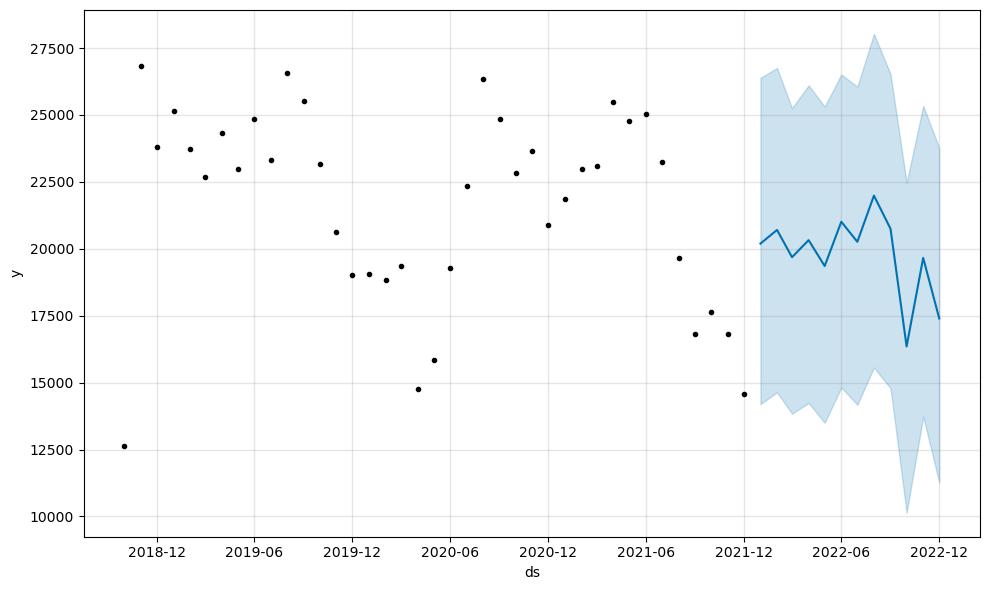

In [172]:
m.plot(forecast)
plt.show()

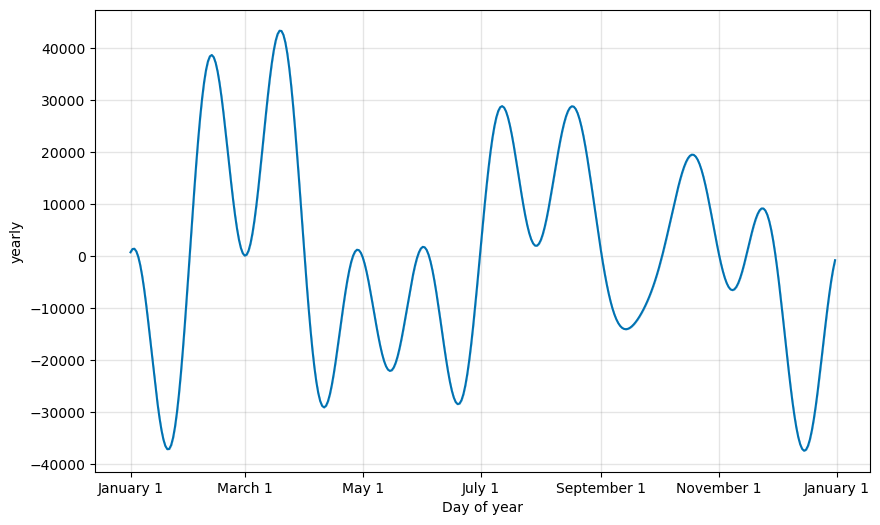

In [173]:
a = plot_yearly(m)

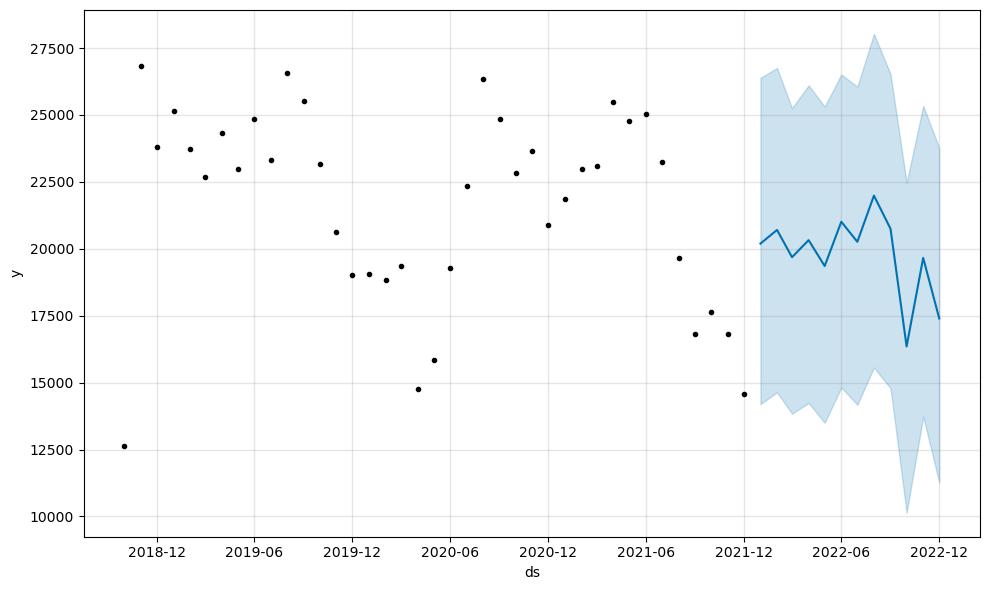

In [174]:
fig1 = m.plot(forecast)

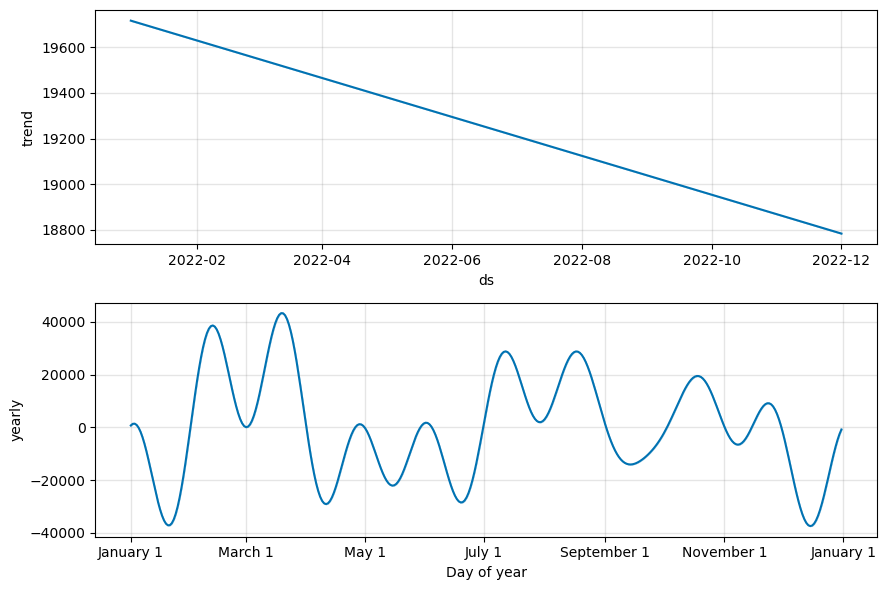

In [175]:
fig2 = m.plot_components(forecast)

17:07:42 - cmdstanpy - INFO - Chain [1] start processing
17:07:42 - cmdstanpy - INFO - Chain [1] done processing


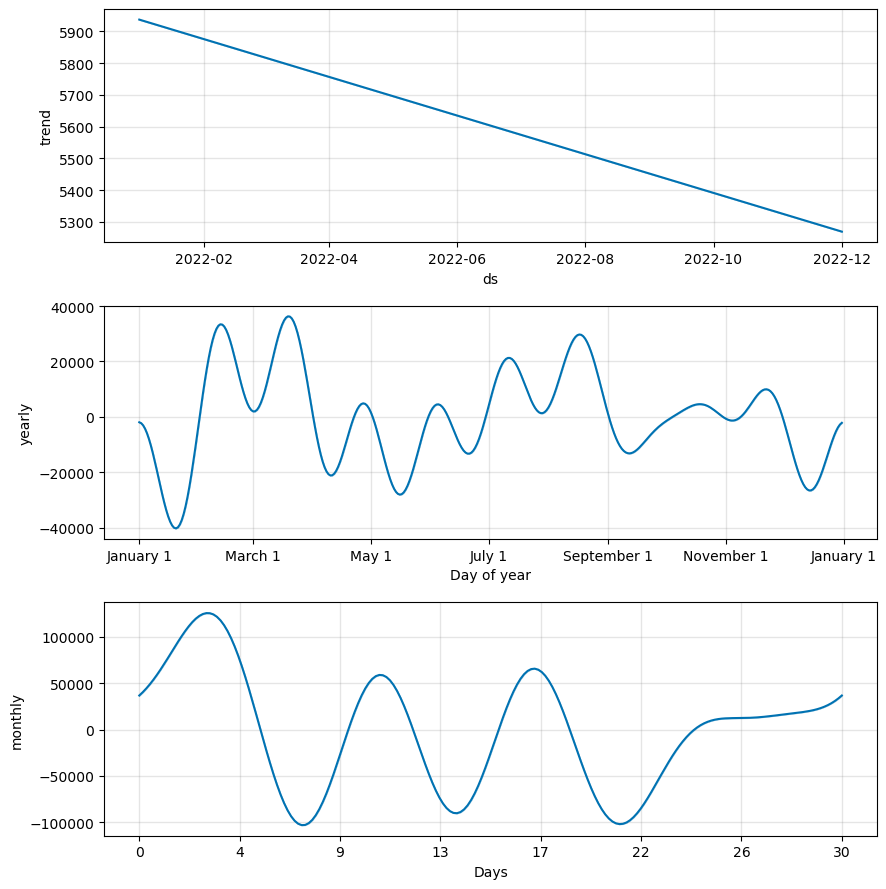

In [176]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
forecast = m.fit(p3365).predict(future)
fig3 = m.plot_components(forecast)

In [177]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = y_test['monthly_door_swings'].values
y_pred = forecast['yhat'].values
mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape)

MAPE: 0.095


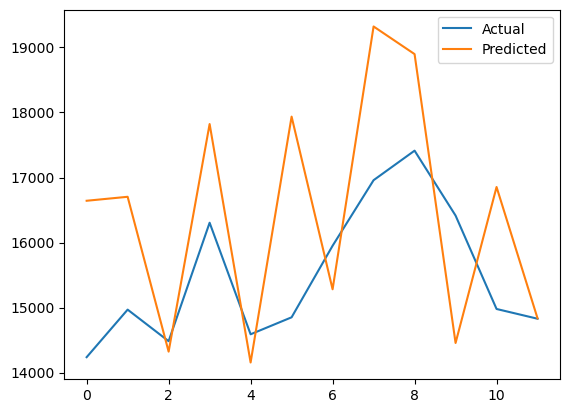

In [178]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

The MAPE for the Prophet model was 9.5%

### 3.3.1 PMDARIMA Model

In [145]:
from pmdarima.arima.utils import ndiffs

In [155]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(y, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                                SARIMAX Results                                
Dep. Variable:     monthly_door_swings   No. Observations:                   51
Model:                  ARIMA(0, 1, 0)   Log Likelihood                -466.874
Date:                 Wed, 25 Jan 2023   AIC                            935.748
Time:                         16:56:42   BIC                            937.660
Sample:                     10-01-2018   HQIC                           936.476
                          - 12-01-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.401e+06   5.53e+05     13.381      0.000    6.32e+06    8.48e+06
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):               337.63
Prob(Q):                              0

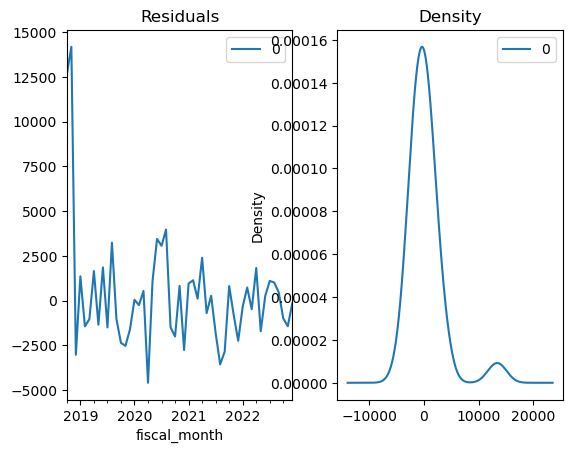

In [160]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

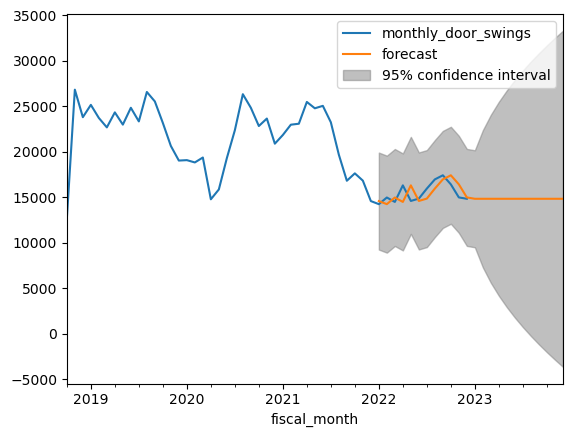

In [164]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = y.loc['2018-10-01':].plot(ax=ax)
plot_predict(model_fit, '2022-01-01', '2023-12-01', ax=ax)
plt.show()